In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import seaborn as sns

# Importing and Reading data

In [4]:
with open('articles.json', 'r') as myfile:
    data=myfile.read()

In [5]:
data = json.loads(data)

In [6]:
df = pd.read_json('articles.json')
df

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering
...,...,...,...
2476,"At the Early Stage, Focus on Unit Economic Pro...","At the Early Stage, Focus on Unit Economic Pro...",Startups & Business
2477,5 Tips to Nail a Successful Product Launch\n\n...,5 Tips to Nail a Successful Product Launch,Startups & Business
2478,Routes to Defensibility for your AI Startup\n\...,Routes to Defensibility for your AI Startup,Engineering
2479,Faster. Faster. Faster.\r\n\r\nI’d like to tal...,Faster. Faster. Faster.,Product & Design


# Feature Extraction 

In [7]:
word_vectorizer_uni = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features =7000)

In [8]:
unigramdataGet= word_vectorizer_uni.fit_transform(df['body'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer_uni.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1

In [9]:
X=unigramdata
y=df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [10]:
selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, df['category'])

unigramdata = selector.transform(unigramdata)

In [11]:
svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)

y_pred = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.83


C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)

y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.68


## Compare Accuracy

In [13]:
from sklearn.metrics import accuracy_score, f1_score

In [14]:
def eval_model(y,y_predicted):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [15]:
eval_model(y_test,y_pred)
a=round(accuracy_score(y_test,y_pred)*100,3)

F1 score of the model
0.8269617706237424
Accuracy of the model
0.8269617706237424
Accuracy of the model in percentage
82.696 %


In [16]:
eval_model(y_test,y_pred1)
b=round(accuracy_score(y_test,y_pred1)*100,3)

F1 score of the model
0.8269617706237424
Accuracy of the model
0.8269617706237424
Accuracy of the model in percentage
82.696 %


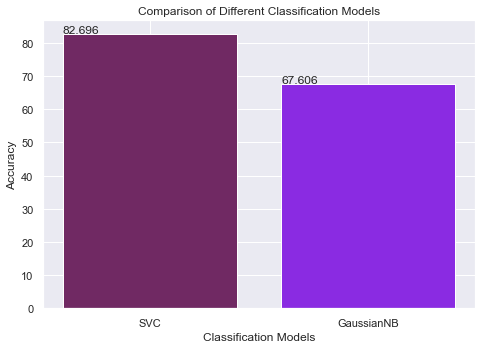

In [17]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['SVC', 'GaussianNB']
Accuracy=[a,b]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2']);
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();

# Cofusion matrix

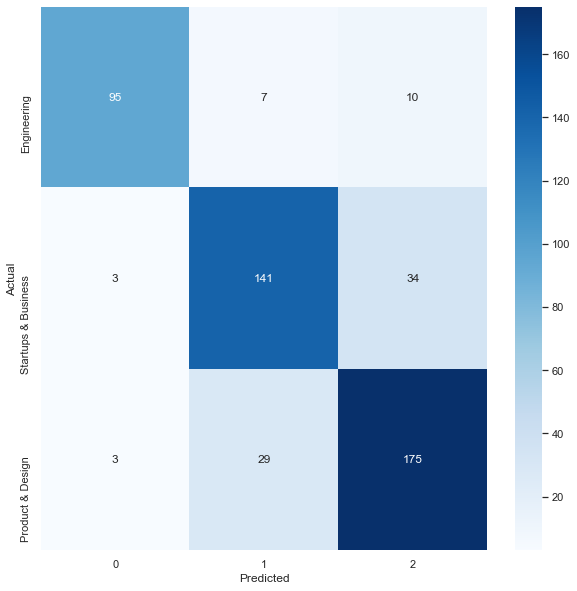

In [26]:
from sklearn.metrics import confusion_matrix
Cofusion_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
           yticklabels=['Engineering', 'Startups & Business', 'Product & Design'], cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()